In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
data1 = np.load('prueba_10k.npy')   
data2 = np.load('prueba_20k.npy')  
data3 = np.load('prueba_50k.npy')  
data4 = np.load('prueba_250k.npy')  

In [4]:

maxi = [max(data1[:,0]),max(data1[:,1]),max(data1[:,2])]
l = math.ceil(max(maxi))
#numero de puntos random
N = 1000
D = 3

#generamos dos arreglos aleatorios de 0 a Lado y con Num puntos, además de dimension Dim
r1= np.zeros((N,D))
#r2 = np.zeros((Num,Dim))

for i in range(N):
    r1[i] = np.random.uniform(0,l,D)
    #r2[i] = np.random.uniform(0,Lado,Dim)    

In [5]:
#distancia entre el punto j y cada uno de los puntos de b 
def distancias(d,r):
    dist = []
#calculamos la distancia de cada uno de los puntos de "d" a cada uno de los puntos de "r", un arreglo random
#el tamaño final de "Distancias" será de N*N pues son las combinaciones de puntos que hay
    for i in d:
        Distancias = np.linalg.norm(i-r,axis=1)
        dist.extend(Distancias)
    return np.array(dist)

#funcion de correlacion
def LS(d,r,NS):
    #NS es el numero de saltos que tendremos en r
    DD = distancias(d,d)
    RR = distancias(r,r)
    DR = distancias(d,r)
    
    rD = np.linspace(0,np.max(DD),NS)
    rR = np.linspace(0,np.max(RR),NS)
    rDR = np.linspace(0,np.max(DR),NS)
    
    e = []
    
    for i in range(NS-1):
    #contamos todas las distancias que estén en un intervalo r - r+dr  (r[i]-r[i+1])
        NDD = len(DD[(DD >= rD[i]) & (DD <= rD[i+1])])
        NRR = len(RR[(RR >= rR[i]) & (RR <= rR[i+1])])
        NDR = len(DR[(DR >= rDR[i]) & (DR <= rDR[i+1])])
        
     #aplicamos Landy y Szalay y lo guardamos como un valor de xi de un r particular (r[i+(1/2)])     
        e.append(NDD/(NRR)-2*NDR/(NRR)+1)

    return rD[:NS-1],np.array(e)

#funcion de correlacion optimizada
def correlacion(d,r,n_bins,rango_bns):
    sumdist = []
    n1=0
    n2=0
    n3=0
    n_DD = 0
    n_RR = 0
    n_DR = 0

    bn = np.linspace(0,rango_bns,n_bins)
   
    #ponemos un for, para usar las mismas variables y que no se llene la memoria
    for i in range(3):
    
        # distancias del arreglo D (no aleatorio) a si mismo
        if i == 0:
                for j in d:
                    Distancias = np.linalg.norm(j-d[0:],axis=1)
                    sumdist.extend(Distancias[Distancias!=0])
                    
                
                DD,b1 = np.histogram(sumdist, bins=bn)
                n_D = len(sumdist)
                sumdist = []
                
        # distancias del arreglo R (aleatorio) a si mismo               
        elif i == 1:
                for j in r:

                    Distancias = np.linalg.norm(j-r[0:],axis=1)
                    sumdist.extend(Distancias[Distancias!=0])
                    
                
                RR,b2 = np.histogram(sumdist, bins=bn)
                n_R = len(sumdist)
                sumdist = []

        # distancias del arreglo D al R
        elif i == 2:
                for j in d:

                    Distancias = np.linalg.norm(j-r,axis=1)
                    sumdist.extend(Distancias)
                    
                
                DR,b3 = np.histogram(sumdist, bins=bn)
                n_DR = len(sumdist)
                sumdist = []
                
    xi = (DD*n_R /n_D  -  2*DR*n_R/n_DR  +  RR)/RR
    #solo necesitamos b3 pues todos miden lo mismo
    return b3[:n_bins-1],xi 

In [27]:
r,e = correlacion(r1,data1,20,l*np.sqrt(D))

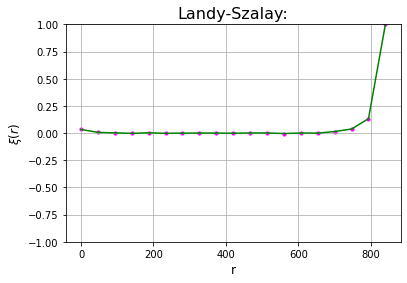

In [28]:
plt.scatter(r,e, s=10, c='magenta')
plt.plot(r,e,'green')
plt.xlabel('r',fontsize=12)
plt.ylabel('$\u03BE(r)$',fontsize=12)
plt.ylim(-1,1)
plt.title('Landy-Szalay:',fontsize=16)
plt.grid();

In [30]:
r,e = correlacion(r1,data2,10,l*np.sqrt(D))

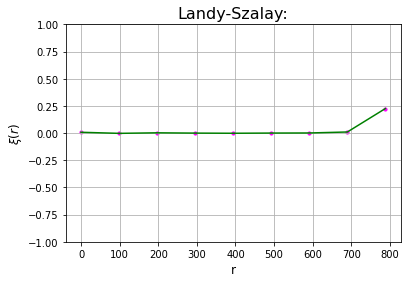

In [31]:
plt.scatter(r,e, s=10, c='magenta')
plt.plot(r,e,'green')
plt.xlabel('r',fontsize=12)
plt.ylabel('$\u03BE(r)$',fontsize=12)
plt.ylim(-1,1)
plt.title('Landy-Szalay:',fontsize=16)
plt.grid();

Para 50k  y 250k utilizamos astroML

In [35]:
import astroML
from astroML.correlation import bootstrap_two_point_angular
from astroML.correlation import bootstrap_two_point
bins = np.linspace(0,l*np.sqrt(D),10)
corr = astroML.correlation.two_point(data1, bins, method='standard', data_R=None, random_state=None)

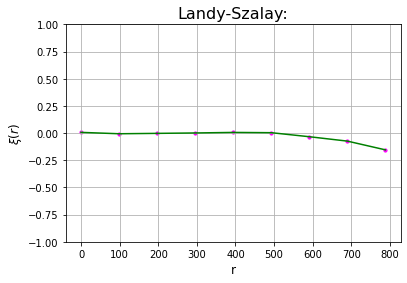

In [39]:
BN = bins[:10-1]
plt.scatter(BN,corr, s=10, c='magenta')
plt.plot(BN,corr,'green')
plt.xlabel('r',fontsize=12)
plt.ylabel('$\u03BE(r)$',fontsize=12)
plt.ylim(-1,1)
plt.title('Landy-Szalay:',fontsize=16)
plt.grid();

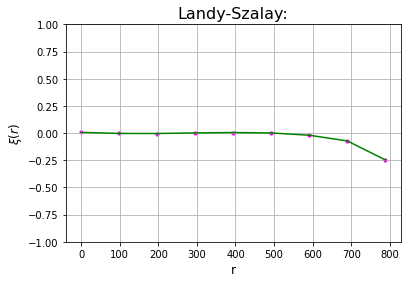

In [40]:
bins = np.linspace(0,l*np.sqrt(D),10)
corr = astroML.correlation.two_point(data3, bins, method='standard', data_R=None, random_state=None)
BN = bins[:10-1]
plt.scatter(BN,corr, s=10, c='magenta')
plt.plot(BN,corr,'green')
plt.xlabel('r',fontsize=12)
plt.ylabel('$\u03BE(r)$',fontsize=12)
plt.ylim(-1,1)
plt.title('Landy-Szalay:',fontsize=16)
plt.grid();

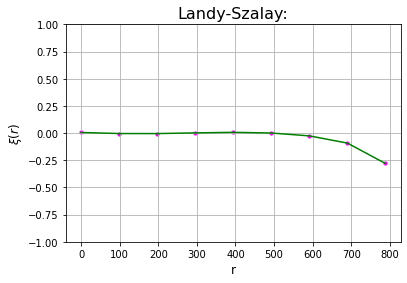

In [6]:
bins = np.linspace(0,l*np.sqrt(D),10)
corr = astroML.correlation.two_point(data4, bins, method='standard', data_R=None, random_state=None)
BN = bins[:10-1]
plt.scatter(BN,corr, s=10, c='magenta')
plt.plot(BN,corr,'green')
plt.xlabel('r',fontsize=12)
plt.ylabel('$\u03BE(r)$',fontsize=12)
plt.ylim(-1,1)
plt.title('Landy-Szalay:',fontsize=16)
plt.grid();